In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
!pip install geopandas
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

In [2]:
df = pd.read_parquet('ppp_loans_naics_lat_long_sample.parq')

In [3]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OfficialNAICSCode,OfficialNAICSDescription,full_address,ZIP5,postal_code,place_name,state_name,state_code,latitude,longitude
439542,8166837101,04/15/2020,0549,PPP,IMPERIAL METAL SOLUTIONS,2284 Scranton Rd.,Cleveland,OH,44113,None,...,325510,Paint and Coating Manufacturing,2284 Scranton Rd. Cleveland OH 44113,44113,44113,Cleveland,Ohio,OH,41.4816,-81.7018
38290,5865948308,01/26/2021,0455,PPS,MACLAN CORPORATION INC.,1808 S Combee Rd,Lakeland,FL,33801-6852,01/26/2021,...,325510,Paint and Coating Manufacturing,1808 S Combee Rd Lakeland FL 33801-6852,33801,33801,Lakeland,Florida,FL,28.0381,-81.9392
475679,9072807009,04/09/2020,0358,PPP,"RIC COATINGS, LLC",1090 CONSTITUTION BLVD,NEW KENSINGTON,PA,15068-6225,None,...,325510,Paint and Coating Manufacturing,1090 CONSTITUTION BLVD NEW KENSINGTON PA 15068...,15068,15068,New Kensington,Pennsylvania,PA,40.5616,-79.7129
120144,2595667208,04/16/2020,0549,PPP,REFRACTORY COATING TECHNOLOGIES INC,542 COLLINS BLVD,ORRVILLE,OH,44667,None,...,325510,Paint and Coating Manufacturing,542 COLLINS BLVD ORRVILLE OH 44667,44667,44667,Orrville,Ohio,OH,40.8458,-81.7741
355289,4854467103,04/13/2020,0130,PPP,"CREATIVE MATERIAL TECHNOLOGIES, LTD",21 Wilbraham St. Unit B-11 Bldg 35,PALMER,MA,01069-9646,None,...,325510,Paint and Coating Manufacturing,21 Wilbraham St. Unit B-11 Bldg 35 PALMER MA 0...,01069,01069,Palmer,Massachusetts,MA,42.1762,-72.3288


In [4]:
df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'RaceEthnicity', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED',
       'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED',
       'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLen

In [5]:
df_plotting = df[['BorrowerName', 'full_address', 'latitude', 'longitude']]
df_plotting.index = np.arange(0,5285)

In [6]:
gdf = gpd.GeoDataFrame(df_plotting,geometry=gpd.points_from_xy(df_plotting.longitude,df.latitude))

In [7]:
gdf

,BorrowerName,full_address,latitude,longitude,geometry
0,IMPERIAL METAL SOLUTIONS,2284 Scranton Rd. Cleveland OH 44113,41.4816,-81.7018,POINT (-81.70180 41.48160)
1,MACLAN CORPORATION INC.,1808 S Combee Rd Lakeland FL 33801-6852,28.0381,-81.9392,POINT (-81.93920 28.03810)
2,"RIC COATINGS, LLC",1090 CONSTITUTION BLVD NEW KENSINGTON PA 15068...,40.5616,-79.7129,POINT (-79.71290 40.56160)
3,REFRACTORY COATING TECHNOLOGIES INC,542 COLLINS BLVD ORRVILLE OH 44667,40.8458,-81.7741,POINT (-81.77410 40.84580)
4,"CREATIVE MATERIAL TECHNOLOGIES, LTD",21 Wilbraham St. Unit B-11 Bldg 35 PALMER MA 0...,42.1762,-72.3288,POINT (-72.32880 42.17620)
...,...,...,...,...,...
5280,NEXTON MINING INC,873 RIVER BLUFF RD NORTH AUGUSTA SC 29841-6056,33.5251,-81.9394,POINT (-81.93940 33.52510)
5281,SOUTHEAST MINERAL CORPORATION OF AMERICA,17850 West Sardis Road Bauxite AR 72011,34.5091,-92.4828,POINT (-92.48280 34.50910)
5282,GALAXY GRANITE AND STONE PRODUCTS INC.,310 W GRANT ST STE B ORLANDO FL 32806-3947,28.5140,-81.3570,POINT (-81.35700 28.51400)
5283,CHILES WORKS LLC,5544 COUNTY ROAD 209 FULTON MO 65251-3801,38.8518,-91.9605,POINT (-91.96050 38.85180)


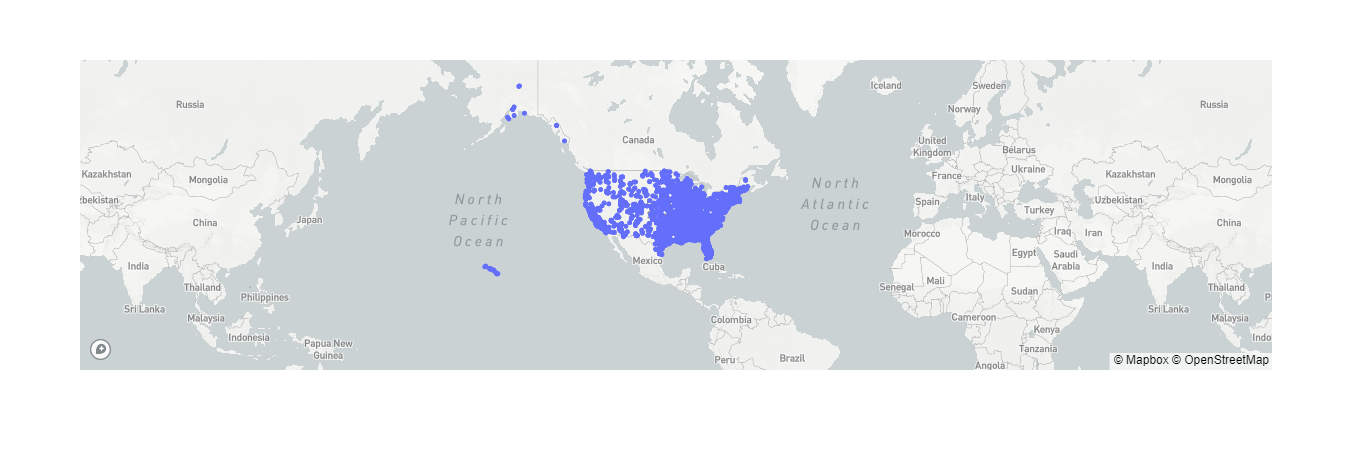

In [13]:
MAPBOX_APIKEY = "pk.eyJ1Ijoic3NvdXlyaXMiLCJhIjoiY2s5MzFlZzl2MDB2ZjNudDlhcnh6MGJsNCJ9.AefdjlX-vS_H7A83-I4sIA"

px.set_mapbox_access_token(MAPBOX_APIKEY)
fig = px.scatter_mapbox(df_plotting,
                        lat=gdf.geometry.y,
                        lon=gdf.geometry.x,
                        hover_name="full_address",
                        zoom=1)
fig.update_geos(fitbounds="locations")
fig.show()

In [9]:
# Data
df = px.data.gapminder().query("year==2007")
df = df.rename(columns=dict(pop="Population",
                            gdpPercap="GDP per Capita",
                            lifeExp="Life Expectancy"))
cols_dd = ["Population", "GDP per Capita", "Life Expectancy"]
# we need to add this to select which trace 
# is going to be visible
visible = np.array(cols_dd)

In [10]:
# define traces and buttons at once
traces = []
buttons = []
for value in cols_dd:
    traces.append(go.Choropleth(
       locations=df['iso_alpha'], # Spatial coordinates
        z=df[value].astype(float), # Data to be color-coded
        colorbar_title=value,
        visible= True if value==cols_dd[0] else False))

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons,
               }]

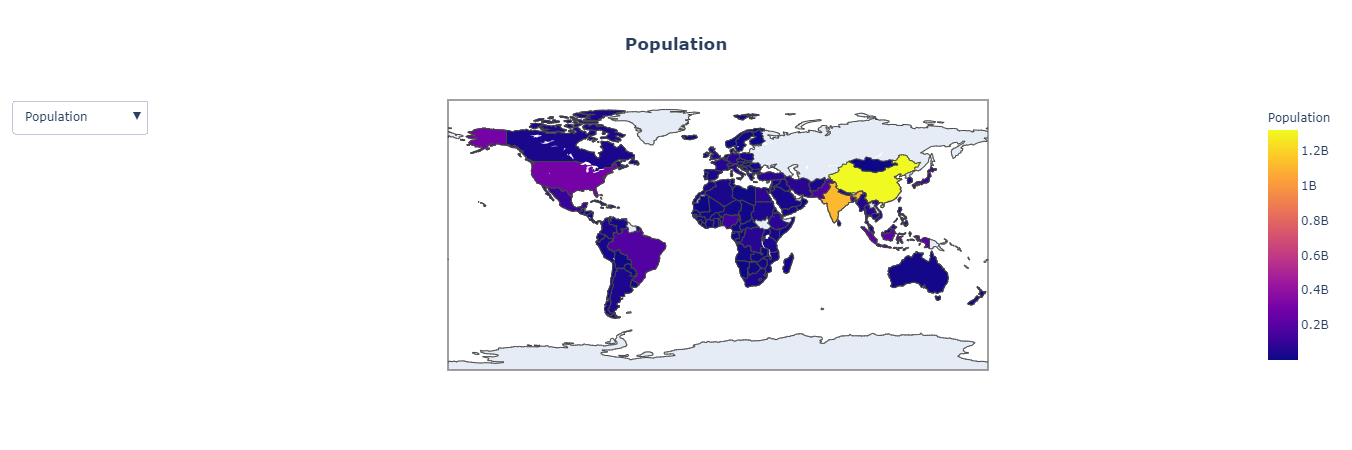

In [11]:
# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))
# This is in order to get the first title displayed correctly
first_title = cols_dd[0]
fig.update_layout(title=f"<b>{first_title}</b>",title_x=0.5)
fig.show()